In [1]:
import matplotlib.pyplot as plt
import numpy as np

from cnn_model import CNNNumberClassifier

In [2]:
cnn_model = CNNNumberClassifier()

In [3]:
loaded_data = cnn_model.load_data()
prepared_data = cnn_model.prep(loaded_data)

INFO:absl:Load dataset info from /Users/arimo/tensorflow_datasets/mnist/3.0.1
INFO:absl:Field info.citation from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.splits from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.module_name from disk and from code do not match. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/arimo/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Constructing tf.data.Dataset for split ['train', 'test'], from /Users/arimo/tensorflow_datasets/mnist/3.0.1


Distribution of Label in Train Data


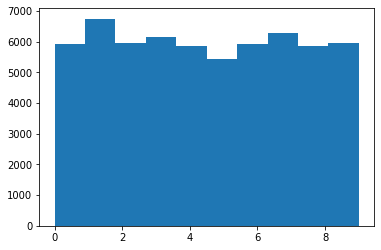

In [4]:
cnn_model.explore(loaded_data)

In [5]:
cnn_model.train(prepared_data)

Epoch 1/6
469/469 [==============================] - 22s 44ms/step - loss: 1.1151 - sparse_categorical_accuracy: 0.6570 - val_loss: 0.1647 - val_sparse_categorical_accuracy: 0.9503
Epoch 2/6
469/469 [==============================] - 26s 56ms/step - loss: 0.1283 - sparse_categorical_accuracy: 0.9619 - val_loss: 0.0978 - val_sparse_categorical_accuracy: 0.9699
Epoch 3/6
469/469 [==============================] - 30s 64ms/step - loss: 0.0808 - sparse_categorical_accuracy: 0.9756 - val_loss: 0.0729 - val_sparse_categorical_accuracy: 0.9767
Epoch 4/6
469/469 [==============================] - 34s 72ms/step - loss: 0.0632 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.0785 - val_sparse_categorical_accuracy: 0.9761
Epoch 5/6
469/469 [==============================] - 32s 68ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0678 - val_sparse_categorical_accuracy: 0.9791
Epoch 6/6
469/469 [==============================] - 33s 70ms/step - loss: 0.0441 - sparse_cate

In [6]:
cnn_model.persist('mnist_cnn_v2')

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
2021-02-01 09:49:09,936 INFO h1st.model_repository.model_repository: Saving model property...
INFO:h1st.model_repository.model_repository:Saving model property...


'mnist_cnn_v2'

In [11]:
from workflow import ImageClsWorkflow

In [12]:
image_cls_workflow = ImageClsWorkflow()

2021-02-01 10:04:38,816 INFO h1st.model_repository.model_repository: Loading version mnist_cnn_v2 ....
INFO:h1st.model_repository.model_repository:Loading version mnist_cnn_v2 ....


In [8]:
import tensorflow as tf 

Distribution of Label in Train Data


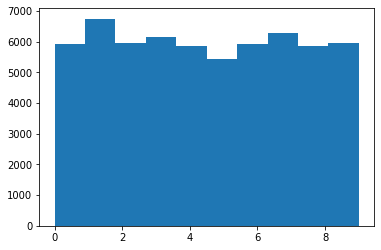

Distribution of Label in Test Data


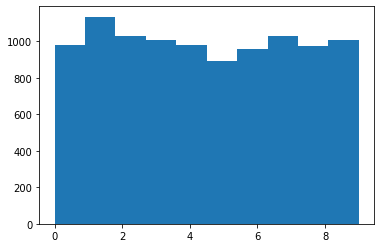

In [10]:
ds_train = loaded_data['ds_train']
y_true = []
for idx, image_set in enumerate(ds_train):
    y_true.append(image_set[1])
y_true = tf.concat(y_true, axis=0)
np_array = y_true.numpy()
print("Distribution of Label in Train Data")
plt.hist(np_array)
plt.show()

ds_test = loaded_data['ds_test']
y_true = []
for idx, image_set in enumerate(ds_test):
    y_true.append(image_set[1])
y_true = tf.concat(y_true, axis=0)
np_array = y_true.numpy()
print("Distribution of Label in Test Data")
plt.hist(np_array)  
plt.show()

In [13]:
X, y = image_set 

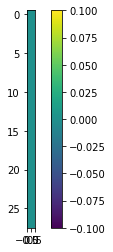

InvalidArgumentError: Index out of range using input dim 0; input has only 0 dims [Op:StridedSlice] name: strided_slice/

In [14]:
plt.figure()
plt.imshow(X[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(y[0])

In [16]:
X.shape

TensorShape([28, 28, 1])

In [17]:
y

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [20]:
image_cls_workflow.predict({"X": tf.expand_dims(X, axis=0)})

{'classification': array([5])}

In [ ]:
print(X[0:1].shape)
out = cnn_model.predict({'X': X[0:1]})
print(out["classification"].shape)
print(np.argmax(out["classification"], axis=1)[0])

In [ ]:
pip install opencv-python

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('drawn_image2.png', 0)
img = cv2.resize(img, (28,28))
print(img.shape)

In [ ]:
img.max()

In [ ]:
input_img = np.expand_dims(np.expand_dims(img, axis=0), axis=3)
input_img.shape

In [ ]:
plt.figure()
plt.imshow(input_img[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(y[0])

In [ ]:
out = cnn_model.predict({'X': input_img})
print(out["classification"].shape)
print(np.argmax(out["classification"], axis=1)[0])

In [21]:
! pwd

/Users/arimo/Desktop/jupyter/default_app
